<a href="https://colab.research.google.com/github/NPCA-TEAM/COVID-19/blob/main/INVESTIGAR_DADOS_covid_ver1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Conexão com o Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Instalação e importação de bibliotecas

In [ ]:
!pip install pyyaml==5.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.4/662.4 KB 16.5 MB/s eta 0:00:00
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


In [ ]:
!pip install darts 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.7/589.7 KB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 64.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 KB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 KB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.3/800.3 KB 

In [ ]:
!pip install matplotlib==3.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.8/37.8 MB 23.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for matplotlib: filename=matplotlib-3.1.1-cp38-cp38-linux_x86_64.whl size=11152173 sha256=638e812ef8b34b75b61367949114c9cc32c6755ba04501f1c82b17aa0afd3cb4
  Stored in directory: /root/.cache/pip/wheels/85/86/f1/054e7477b5e68f3c4a1258d12ae1c2205d6889283ce631dfe5
Successfully built matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.2
    Uninstalling matplotlib-3.6.2:
      Successfully uninstalled matplotlib-3.6.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nfoursid 1.0.1 requires matplotlib>=3.3, but you have matplotlib 3.1.1 which is incompatible.
darts 0.23.0 requires matplotlib>=

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import glob
import os
import sys
import time
import torch
import seaborn as sns 

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

from datetime import datetime
from darts import TimeSeries, timeseries

from darts.models import (
    NaiveSeasonal,
    NaiveDrift,
    NaiveMean,
    NaiveEnsembleModel,   
)

from darts.metrics import mape, mase, rmse
from darts.utils.statistics import check_seasonality, plot_acf, plot_residuals_analysis, plot_hist

import warnings
warnings.filterwarnings('ignore')
import logging
logging.disable(logging.CRITICAL)
torch.manual_seed(1); np.random.seed(1)  # for reproducibility

##Seleção dos dados e leitura do dataset para casos

In [ ]:
#Seleciona o arquivo recentemente baixado da pasta de CSVs
pasta = '/content/drive/MyDrive/NPCA - COVID/_CASOS/DataSet/'
lista_de_arquivos = glob.glob(pasta + '*') 
#Seleciona o ultimo arquivo que foi criado e adicionado na pasta
arquivo_casos = max(lista_de_arquivos, key=os.path.getctime) 
arquivo_casos

'/content/drive/MyDrive/NPCA - COVID/_CASOS/DataSet/Dataset_31_12_2022.xlsx'

In [ ]:
#Leitura do Arquivo
data_set_casos = pd.read_excel(arquivo_casos)
data_set_casos

,data,Casos_DataSintoma_MM_atual_PA,Casos_Publicacao_MM_atual_PA,Casos_DataSintoma_MM_7dias_PA,Casos_Publicacao_MM_7dias_PA,Casos_DataSintoma_MM_14dias_PA,Casos_Publicacao_MM_14dias_PA,Vacinacao_Dose1_%decimal_PA,Vacinacao_Dose2_%decimal_PA,Vacinacao_Dose3_%decimal_PA
0,2020-03-01,20.571429,0.000000,20.571429,0.0,20.571429,0.0,NaN,NaN,NaN
1,2020-03-02,26.285714,0.000000,26.285714,0.0,26.285714,0.0,NaN,NaN,NaN
2,2020-03-03,35.714286,0.000000,35.714286,0.0,35.714286,0.0,NaN,NaN,NaN
3,2020-03-04,40.142857,0.000000,40.142857,0.0,40.142857,0.0,NaN,NaN,NaN
4,2020-03-05,68.000000,0.000000,68.000000,0.0,68.000000,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1031,2022-12-27,16.571429,144.857143,NaN,NaN,NaN,NaN,0.798519,0.754516,0.289786
1032,2022-12-28,13.428571,138.571429,NaN,NaN,NaN,NaN,0.798519,0.754516,0.289786
1033,2022-12-29,10.000000,117.571429,NaN,NaN,NaN,NaN,0.798519,0.754516,0.289786
1034,2022-12-30,8.285714,121.571429,NaN,NaN,NaN,NaN,0.798519,0.754516,0.289786


##Seleção dos dados e leitura do dataset para óbitos

In [ ]:
#Seleciona o arquivo recentemente baixado da pasta de dataset
pasta1 = '/content/drive/MyDrive/NPCA - COVID/_OBITOS/DataSet/'
lista_de_arquivos1 = glob.glob(pasta1 + '*') 
#Seleciona o ultimo arquivo que foi criado e adicionado na pasta
arquivo_obitos = max(lista_de_arquivos1, key=os.path.getctime) 
arquivo_obitos

'/content/drive/MyDrive/NPCA - COVID/_OBITOS/DataSet/Dataset_31_12_2022.xlsx'

In [ ]:
#Leitura do Arquivo
data_set_obitos = pd.read_excel(arquivo_obitos)
data_set_obitos

,data,Obitos_DataOcorrencia_MM_atual_PA,Obitos_Publicacao_MM_atual_PA,Obitos_DataOcorrencia_MM_7dias_PA,Obitos_Publicacao_MM_7dias_PA,Obitos_DataOcorrencia_MM_14dias_PA,Obitos_Publicacao_MM_14dias_PA,Casos_DataSintoma_MM_atual_PA,Casos_Publicacao_MM_atual_PA,Casos_DataSintoma_MM_7dias_PA,Casos_Publicacao_MM_7dias_PA,Casos_DataSintoma_MM_14dias_PA,Casos_Publicacao_MM_14dias_PA,Vacinacao_Dose1_%decimal_PA,Vacinacao_Dose2_%decimal_PA,Vacinacao_Dose3_%decimal_PA
0,2020-03-01,0.0,0.000000,0.0,0.0,0.0,0.0,20.571429,0.000000,20.571429,0.0,20.571429,0.0,NaN,NaN,NaN
1,2020-03-02,0.0,0.000000,0.0,0.0,0.0,0.0,26.285714,0.000000,26.285714,0.0,26.285714,0.0,NaN,NaN,NaN
2,2020-03-03,0.0,0.000000,0.0,0.0,0.0,0.0,35.714286,0.000000,35.714286,0.0,35.714286,0.0,NaN,NaN,NaN
3,2020-03-04,0.0,0.000000,0.0,0.0,0.0,0.0,40.142857,0.000000,40.142857,0.0,40.142857,0.0,NaN,NaN,NaN
4,2020-03-05,0.0,0.000000,0.0,0.0,0.0,0.0,68.000000,0.000000,68.000000,0.0,68.000000,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031,2022-12-27,0.0,1.285714,NaN,NaN,NaN,NaN,16.571429,144.857143,NaN,NaN,NaN,NaN,0.798519,0.754516,0.289786
1032,2022-12-28,0.0,1.428571,NaN,NaN,NaN,NaN,13.428571,138.571429,NaN,NaN,NaN,NaN,0.798519,0.754516,0.289786
1033,2022-12-29,0.0,1.142857,NaN,NaN,NaN,NaN,10.000000,117.571429,NaN,NaN,NaN,NaN,0.798519,0.754516,0.289786
1034,2022-12-30,0.0,1.142857,NaN,NaN,NaN,NaN,8.285714,121.571429,NaN,NaN,NaN,NaN,0.798519,0.754516,0.289786


##Tratamento dos dados para as variáveis de casos e óbitos

In [ ]:
#Substitue valores negativos por valores iqual zero. 

data_set_casos['Casos_DataSintoma_MM_atual_PA'] = np.where(data_set_casos['Casos_DataSintoma_MM_atual_PA'] <= 0, 0.00001, data_set_casos['Casos_DataSintoma_MM_atual_PA'])
data_set_casos['Casos_Publicacao_MM_atual_PA'] = np.where(data_set_casos['Casos_Publicacao_MM_atual_PA'] <= 0, 0.00001, data_set_casos['Casos_Publicacao_MM_atual_PA'])
data_set_casos['Casos_DataSintoma_MM_7dias_PA'] = np.where(data_set_casos['Casos_DataSintoma_MM_7dias_PA'] <= 0, 0.00001, data_set_casos['Casos_DataSintoma_MM_7dias_PA'])
data_set_casos['Casos_Publicacao_MM_7dias_PA'] = np.where(data_set_casos['Casos_Publicacao_MM_7dias_PA'] <= 0, 0.00001, data_set_casos['Casos_Publicacao_MM_7dias_PA'])
data_set_casos['Casos_DataSintoma_MM_14dias_PA'] = np.where(data_set_casos['Casos_DataSintoma_MM_14dias_PA'] <= 0, 0.00001, data_set_casos['Casos_DataSintoma_MM_14dias_PA'])
data_set_casos['Casos_Publicacao_MM_14dias_PA'] = np.where(data_set_casos['Casos_Publicacao_MM_14dias_PA'] <= 0, 0.00001, data_set_casos['Casos_Publicacao_MM_14dias_PA'])
data_set_casos['Vacinacao_Dose1_%decimal_PA'] = np.where(data_set_casos['Vacinacao_Dose1_%decimal_PA'] <= 0, 0.00001, data_set_casos['Vacinacao_Dose1_%decimal_PA'])
data_set_casos['Vacinacao_Dose2_%decimal_PA'] = np.where(data_set_casos['Vacinacao_Dose2_%decimal_PA'] <= 0, 0.00001, data_set_casos['Vacinacao_Dose2_%decimal_PA'])
data_set_casos['Vacinacao_Dose3_%decimal_PA'] = np.where(data_set_casos['Vacinacao_Dose3_%decimal_PA'] <= 0, 0.00001, data_set_casos['Vacinacao_Dose3_%decimal_PA'])
data_set_casos

,data,Casos_DataSintoma_MM_atual_PA,Casos_Publicacao_MM_atual_PA,Casos_DataSintoma_MM_7dias_PA,Casos_Publicacao_MM_7dias_PA,Casos_DataSintoma_MM_14dias_PA,Casos_Publicacao_MM_14dias_PA,Vacinacao_Dose1_%decimal_PA,Vacinacao_Dose2_%decimal_PA,Vacinacao_Dose3_%decimal_PA
0,2020-03-01,20.571429,0.000010,20.571429,0.00001,20.571429,0.00001,NaN,NaN,NaN
1,2020-03-02,26.285714,0.000010,26.285714,0.00001,26.285714,0.00001,NaN,NaN,NaN
2,2020-03-03,35.714286,0.000010,35.714286,0.00001,35.714286,0.00001,NaN,NaN,NaN
3,2020-03-04,40.142857,0.000010,40.142857,0.00001,40.142857,0.00001,NaN,NaN,NaN
4,2020-03-05,68.000000,0.000010,68.000000,0.00001,68.000000,0.00001,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1031,2022-12-27,16.571429,144.857143,NaN,NaN,NaN,NaN,0.798519,0.754516,0.289786
1032,2022-12-28,13.428571,138.571429,NaN,NaN,NaN,NaN,0.798519,0.754516,0.289786
1033,2022-12-29,10.000000,117.571429,NaN,NaN,NaN,NaN,0.798519,0.754516,0.289786
1034,2022-12-30,8.285714,121.571429,NaN,NaN,NaN,NaN,0.798519,0.754516,0.289786


In [ ]:
#Substitue valores negativos e iguais a zer0 por valores decimais que não afetarão a análise dos dados. 

data_set_obitos['Obitos_DataOcorrencia_MM_atual_PA'] = np.where(data_set_obitos['Obitos_DataOcorrencia_MM_atual_PA'] <= 0, 0.00001, data_set_obitos['Obitos_DataOcorrencia_MM_atual_PA'])
data_set_obitos['Obitos_Publicacao_MM_atual_PA'] = np.where(data_set_obitos['Obitos_Publicacao_MM_atual_PA'] <= 0, 0.00001, data_set_obitos['Obitos_Publicacao_MM_atual_PA'])
data_set_obitos['Obitos_DataOcorrencia_MM_7dias_PA'] = np.where(data_set_obitos['Obitos_DataOcorrencia_MM_7dias_PA'] <= 0, 0.00001, data_set_obitos['Obitos_DataOcorrencia_MM_7dias_PA'])
data_set_obitos['Obitos_Publicacao_MM_7dias_PA'] = np.where(data_set_obitos['Obitos_Publicacao_MM_7dias_PA'] <= 0, 0.00001, data_set_obitos['Obitos_Publicacao_MM_7dias_PA'])
data_set_obitos['Obitos_DataOcorrencia_MM_14dias_PA'] = np.where(data_set_obitos['Obitos_DataOcorrencia_MM_14dias_PA'] <= 0, 0.00001, data_set_obitos['Obitos_DataOcorrencia_MM_14dias_PA'])
data_set_obitos['Obitos_Publicacao_MM_14dias_PA'] = np.where(data_set_obitos['Obitos_Publicacao_MM_14dias_PA'] <= 0, 0.00001, data_set_obitos['Obitos_Publicacao_MM_14dias_PA'])
data_set_obitos

,data,Obitos_DataOcorrencia_MM_atual_PA,Obitos_Publicacao_MM_atual_PA,Obitos_DataOcorrencia_MM_7dias_PA,Obitos_Publicacao_MM_7dias_PA,Obitos_DataOcorrencia_MM_14dias_PA,Obitos_Publicacao_MM_14dias_PA,Casos_DataSintoma_MM_atual_PA,Casos_Publicacao_MM_atual_PA,Casos_DataSintoma_MM_7dias_PA,Casos_Publicacao_MM_7dias_PA,Casos_DataSintoma_MM_14dias_PA,Casos_Publicacao_MM_14dias_PA,Vacinacao_Dose1_%decimal_PA,Vacinacao_Dose2_%decimal_PA,Vacinacao_Dose3_%decimal_PA
0,2020-03-01,0.00001,0.000010,0.00001,0.00001,0.00001,0.00001,20.571429,0.000000,20.571429,0.0,20.571429,0.0,NaN,NaN,NaN
1,2020-03-02,0.00001,0.000010,0.00001,0.00001,0.00001,0.00001,26.285714,0.000000,26.285714,0.0,26.285714,0.0,NaN,NaN,NaN
2,2020-03-03,0.00001,0.000010,0.00001,0.00001,0.00001,0.00001,35.714286,0.000000,35.714286,0.0,35.714286,0.0,NaN,NaN,NaN
3,2020-03-04,0.00001,0.000010,0.00001,0.00001,0.00001,0.00001,40.142857,0.000000,40.142857,0.0,40.142857,0.0,NaN,NaN,NaN
4,2020-03-05,0.00001,0.000010,0.00001,0.00001,0.00001,0.00001,68.000000,0.000000,68.000000,0.0,68.000000,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031,2022-12-27,0.00001,1.285714,NaN,NaN,NaN,NaN,16.571429,144.857143,NaN,NaN,NaN,NaN,0.798519,0.754516,0.289786
1032,2022-12-28,0.00001,1.428571,NaN,NaN,NaN,NaN,13.428571,138.571429,NaN,NaN,NaN,NaN,0.798519,0.754516,0.289786
1033,2022-12-29,0.00001,1.142857,NaN,NaN,NaN,NaN,10.000000,117.571429,NaN,NaN,NaN,NaN,0.798519,0.754516,0.289786
1034,2022-12-30,0.00001,1.142857,NaN,NaN,NaN,NaN,8.285714,121.571429,NaN,NaN,NaN,NaN,0.798519,0.754516,0.289786


##Instanciação das séries temporais principais e das variaveis secundarias para Casos

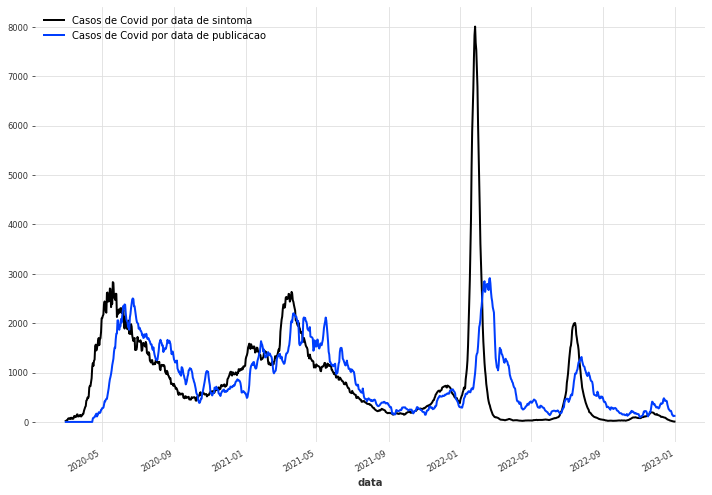

In [ ]:
#Converte coluna de data (strng) para datetime 
data_set_casos['data'] = pd.to_datetime(data_set_casos['data'])
#Converte o tipo de dado datetime para formato de data Ano-Mês-Dia
data_set_casos['data'] = data_set_casos['data'].values.astype('datetime64[D]')

# Seleciona as series temporais dropando as colunas
df_sintoma = data_set_casos.drop(data_set_casos.columns[2], axis=1, inplace=False)
serie_sintoma = TimeSeries.from_dataframe(df_sintoma,'data','Casos_DataSintoma_MM_atual_PA')
df_publicacao = data_set_casos.drop(data_set_casos.columns[1], axis=1, inplace=False)
serie_publicacao = TimeSeries.from_dataframe(df_publicacao,'data','Casos_Publicacao_MM_atual_PA')

#Gráfico com as informações das séries temporais
plt.figure(figsize = (12, 8))
serie_sintoma.plot(label='Casos de Covid por data de sintoma')
serie_publicacao.plot(label='Casos de Covid por data de publicacao')

In [ ]:
#Seleção das variáveis auxiliares
sintoma_7dias = data_set_casos.loc[:, ['data', 'Casos_DataSintoma_MM_7dias_PA']].fillna(0)
publicacao_7dias = data_set_casos.loc[:, ['data', 'Casos_Publicacao_MM_7dias_PA']].fillna(0)
sintoma_14dias = data_set_casos.loc[:, ['data', 'Casos_DataSintoma_MM_14dias_PA']].fillna(0)
publicacao_14dias = data_set_casos.loc[:, ['data', 'Casos_Publicacao_MM_14dias_PA']].fillna(0)

vacinacao_1Dose = data_set_casos.loc[:, ['data', 'Vacinacao_Dose1_%decimal_PA']].fillna(0)
vacinacao_2Dose = data_set_casos.loc[:, ['data', 'Vacinacao_Dose2_%decimal_PA']].fillna(0)
vacinacao_3Dose = data_set_casos.loc[:, ['data', 'Vacinacao_Dose3_%decimal_PA']].fillna(0)


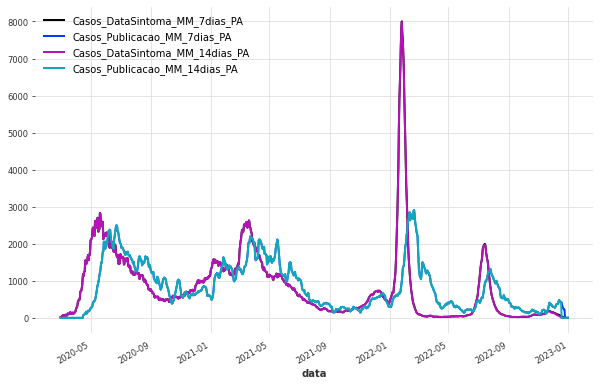

In [ ]:
# criação das séries temporais auxiliares de sintoma e publicacao de 7 e 14 dias

serie_sintoma_7dias = TimeSeries.from_dataframe(sintoma_7dias,'data','Casos_DataSintoma_MM_7dias_PA')
serie_publicacao_7dias = TimeSeries.from_dataframe(publicacao_7dias,'data','Casos_Publicacao_MM_7dias_PA')
serie_sintoma_14dias = TimeSeries.from_dataframe(sintoma_14dias,'data','Casos_DataSintoma_MM_14dias_PA')
serie_publicacao_14dias = TimeSeries.from_dataframe(publicacao_14dias ,'data','Casos_Publicacao_MM_14dias_PA')

plt.figure(figsize = (10, 6))

serie_sintoma_7dias.plot()
serie_publicacao_7dias.plot()
serie_sintoma_14dias.plot()
serie_publicacao_14dias.plot()

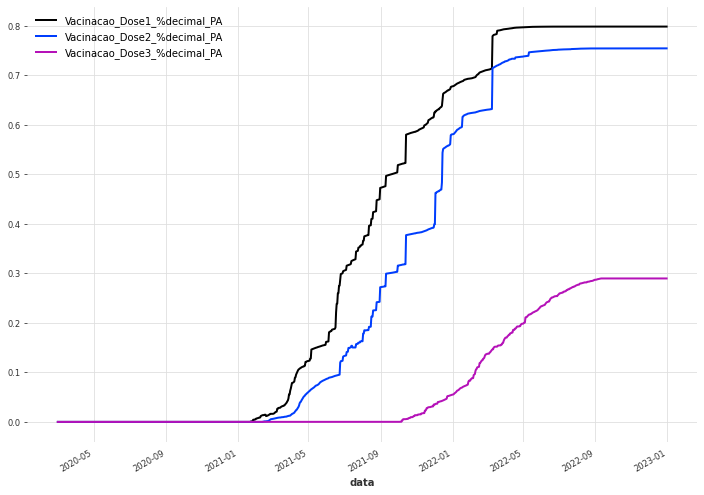

In [ ]:
# criação das séries temporais auxiliares de vacinação
serie_vacinacao_1Dose = TimeSeries.from_dataframe(df=vacinacao_1Dose, time_col='data')
serie_vacinacao_2Dose = TimeSeries.from_dataframe(df=vacinacao_2Dose, time_col='data')
serie_vacinacao_3Dose = TimeSeries.from_dataframe(df=vacinacao_3Dose, time_col='data')

plt.figure(figsize = (12, 8))

serie_vacinacao_1Dose.plot()
serie_vacinacao_2Dose.plot()
serie_vacinacao_3Dose.plot()

##Instanciação das séries temporais principais para óbitos

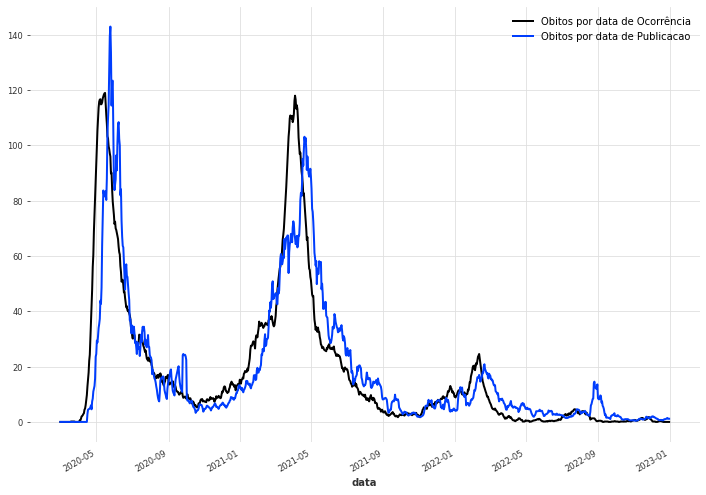

In [ ]:
#Converte coluna de data (strng) para datetime 
data_set_obitos['data'] = pd.to_datetime(data_set_casos['data'])
#Converte o tipo de dado datetime para formato de data Ano-Mês-Dia
data_set_obitos['data'] = data_set_casos['data'].values.astype('datetime64[D]')

# Seleciona as series temporais dropando as colunas
df_obito_ocorrencia = data_set_obitos.drop(data_set_obitos.columns[2], axis=1, inplace=False).fillna(0)
serie_obito_ocorrencia = TimeSeries.from_dataframe(df_obito_ocorrencia,'data','Obitos_DataOcorrencia_MM_atual_PA')
df_obito_publicacao = data_set_obitos.drop(data_set_obitos.columns[1], axis=1, inplace=False).fillna(0)
serie_obito_publicacao = TimeSeries.from_dataframe(df_obito_publicacao,'data','Obitos_Publicacao_MM_atual_PA')

#Gráfico com as informações das séries temporais
plt.figure(figsize = (12, 8))
serie_obito_ocorrencia.plot(label='Obitos por data de Ocorrência')
serie_obito_publicacao.plot(label='Obitos por data de Publicacao')

## Estatística descritiva para Casos e Obitos
(media, desviopadrão, minimo, máximo)


In [ ]:
#Calcula a estatística descritiva de todas as variaveis do dataset
statistic = data_set_obitos.loc[:, ['Obitos_DataOcorrencia_MM_atual_PA', 'Obitos_Publicacao_MM_atual_PA','Casos_DataSintoma_MM_atual_PA', 'Casos_Publicacao_MM_atual_PA']]
statistic.rename(columns = {'Obitos_DataOcorrencia_MM_atual_PA': 'Deaths_Occurrence_date', 'Obitos_Publicacao_MM_atual_PA': 'Deaths_Publication_date', 'Casos_DataSintoma_MM_atual_PA': 'Cases_Symptom_date', 'Casos_Publicacao_MM_atual_PA':'Cases_Publication_date'}, inplace=True)
x = statistic.describe()
x.to_excel("describe.xlsx", index = True, encoding = 'utf-8')
x

,Deaths_Occurrence_date,Deaths_Publication_date,Cases_Symptom_date,Cases_Publication_date
count,1036.000000,1036.000000,1036.000000,1036.000000
mean,18.297298,18.293850,831.248897,830.924159
std,26.727223,24.609053,1000.935481,654.096345
min,0.000010,0.000010,7.142857,0.000000
25%,1.571429,3.428571,134.928571,290.214286
50%,8.428571,7.857143,554.571429,608.285714
75%,22.571429,20.428571,1213.214286,1271.821429
max,119.000000,143.000000,8004.000000,2911.571429


Matriz de correlação de Pearson

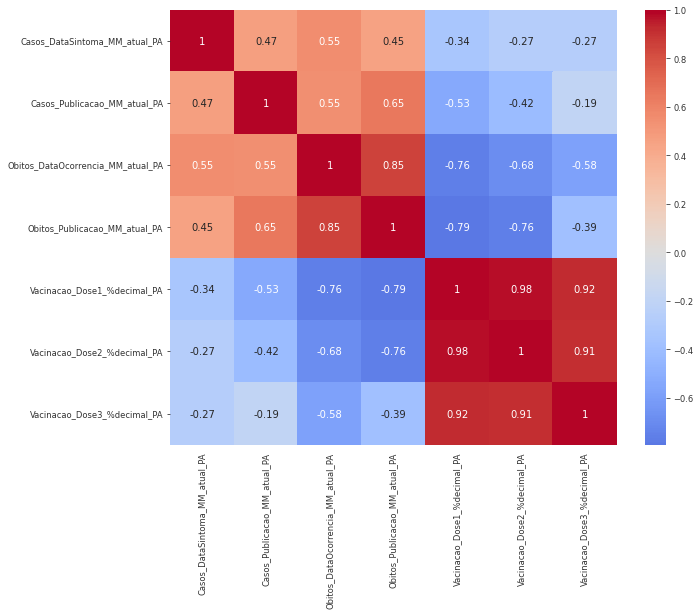

In [ ]:
#calcula a correlacao de pearson entre as variaveis principais e de vacinação
corr_df = data_set_obitos.loc[:, ['Casos_DataSintoma_MM_atual_PA','Casos_Publicacao_MM_atual_PA','Obitos_DataOcorrencia_MM_atual_PA', 
                                   'Obitos_Publicacao_MM_atual_PA','Vacinacao_Dose1_%decimal_PA', 'Vacinacao_Dose2_%decimal_PA', 'Vacinacao_Dose3_%decimal_PA']]
corr = corr_df.corr(method='pearson')

#cria uma matriz de correlaçao entre as colunas da tabela do dataset
plt.figure(figsize=(10, 8))
ax = sns.heatmap(corr, cmap = "coolwarm", center = 0,  annot=True)
ax.get_ylim()
ax.set_ylim(7.0, 0)
figs = ax.get_figure()
figs.savefig('/content/drive/MyDrive/NPCA - COVID/_CASOS/Figs/matrizdecorrelacao.png', dpi=300, transparent=False, bbox_inches='tight')
plt.show()

##Visualização Inicial

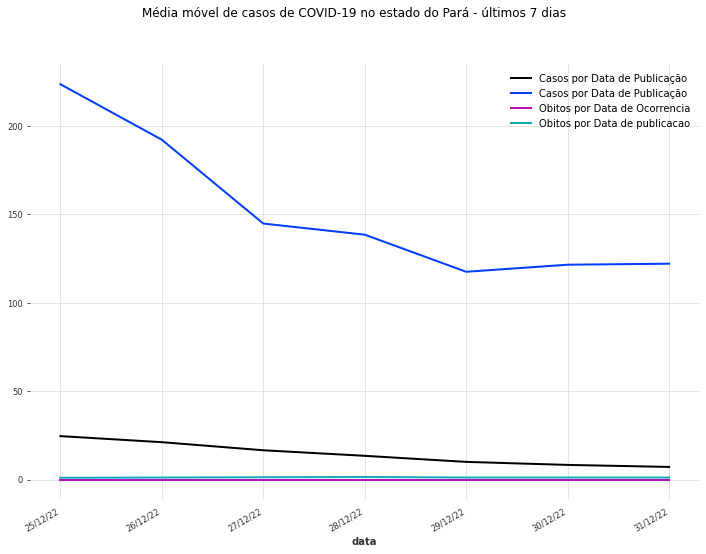

In [ ]:
# Seleciona os ultimos 7 dias para inspecionar sazonalidade e fazer prediçoes com os modelos ingenuos
num_dias_val = 7
train_sintoma, val_sintoma = serie_sintoma[:-num_dias_val], serie_sintoma[-num_dias_val:]
train_publicacao, val_publicacao = serie_publicacao[:-num_dias_val], serie_publicacao[-num_dias_val:]
train_obito_ocorrencia, val_obito_ocorrencia = serie_obito_ocorrencia[:-num_dias_val], serie_obito_ocorrencia[-num_dias_val:]
train_obito_publicacao, val_obito_publicacao =  serie_obito_publicacao[:-num_dias_val], serie_obito_publicacao[-num_dias_val:]

#plota a serie com os casos por data do sintoma e publicacao dos ultimos 7 dias
fig, ax = plt.subplots(figsize=(12,8));
fig.suptitle('Média móvel de casos de COVID-19 no estado do Pará - últimos '+str(num_dias_val)+' dias', fontsize=12)
val_sintoma.plot(label='Casos por Data de Publicação')
val_publicacao.plot(label='Casos por Data de Publicação')
val_obito_ocorrencia.plot(label='Obitos por Data de Ocorrencia')
val_obito_publicacao.plot(label='Obitos por Data de publicacao')
ax.xaxis.set_major_formatter(DateFormatter("%d/%m/%y"))

##Análise das series temporais

In [ ]:
#Listas para armazenar os valores de sazonalidade
lista_casos_sintoma = []
lista_casos_publicacao = []
lista_obitos_ocorrencia = []
lista_obitos_publicacao = []

In [ ]:
#Verificar se existe sazonalidade nas series
def verificar_sazonalidade(serie_temporal, list):
  list.clear()
  for m in range(2, 365):
      sazonal, periodo = check_seasonality(serie_temporal, m = m, max_lag = 365, alpha=0.05)
      if sazonal:
       print('Há sazonalidade de ordem {}.'.format(periodo))
       list.append(periodo)
       plot_acf(serie_temporal, m = m, max_lag = 365, alpha = 0.05)

Há sazonalidade de ordem 170.
Há sazonalidade de ordem 260.
Há sazonalidade de ordem 313.


[170, 260, 313]

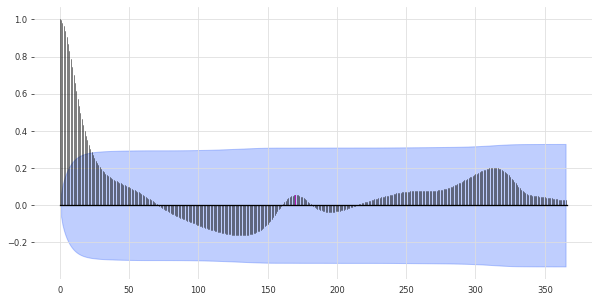

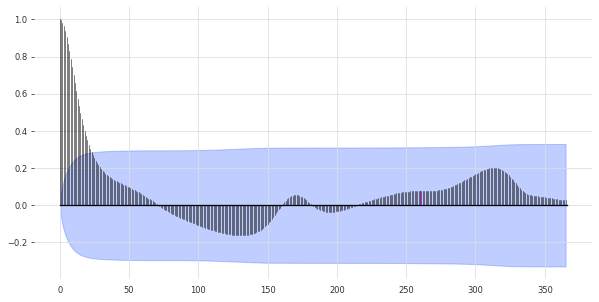

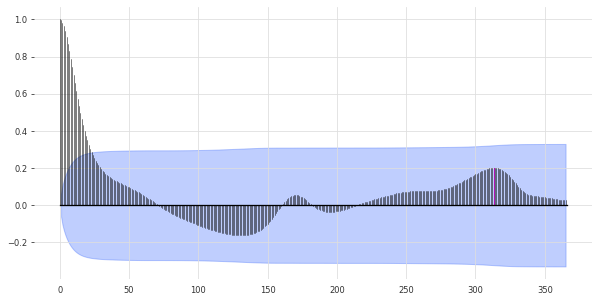

In [ ]:
verificar_sazonalidade(serie_sintoma, lista_casos_sintoma)
lista_casos_sintoma

Há sazonalidade de ordem 299.


[299]

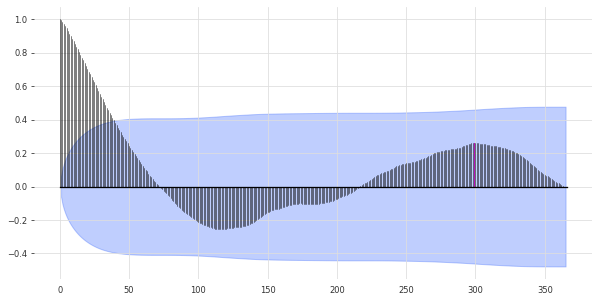

In [ ]:
verificar_sazonalidade(serie_publicacao, lista_casos_publicacao)
lista_casos_publicacao

Há sazonalidade de ordem 319.


[319]

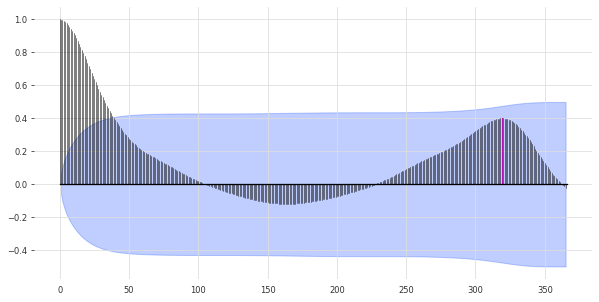

In [ ]:
verificar_sazonalidade(serie_obito_ocorrencia, lista_obitos_ocorrencia)
lista_obitos_ocorrencia

Há sazonalidade de ordem 314.
Há sazonalidade de ordem 319.
Há sazonalidade de ordem 323.


[314, 319, 323]

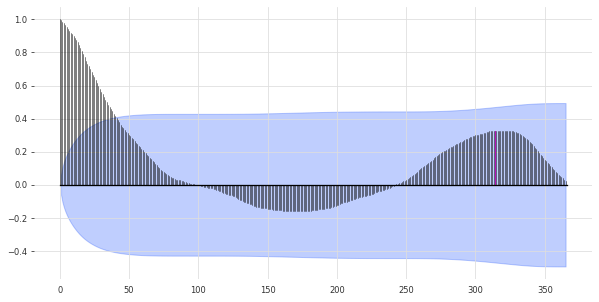

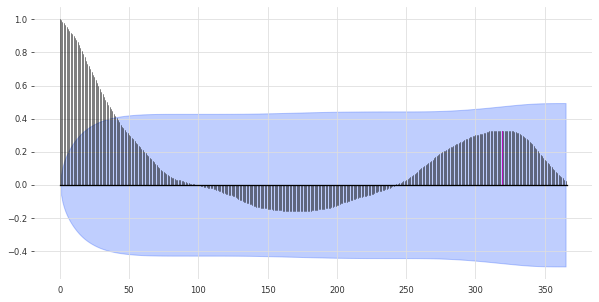

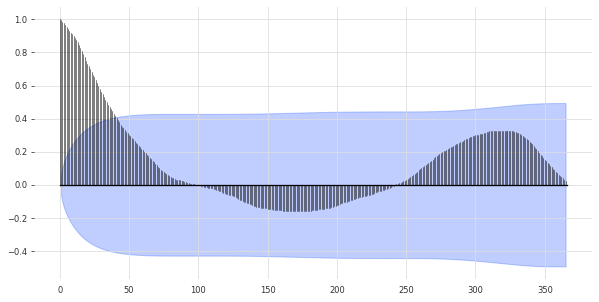

In [ ]:
verificar_sazonalidade(serie_obito_publicacao, lista_obitos_publicacao)
lista_obitos_publicacao

##Aplicar modelos ingénuos

**Treinos com o Modelo Ingênuo NaiveSeasonal**

In [ ]:
predict_caso_sintoma = []
for x in lista_casos_sintoma:
      NaiveSeasonal_model = NaiveSeasonal(K = x)
      NaiveSeasonal_model.fit(train_sintoma)
      y = NaiveSeasonal_model.predict(num_dias_val)
      description = ('Casos_Data_Sintoma')
      z = (x, y, description)
      predict_caso_sintoma.append(z)

In [ ]:
predict_caso_publicacao = []
for x in lista_casos_publicacao:
      NaiveSeasonal_model = NaiveSeasonal(K = x)
      NaiveSeasonal_model.fit(train_publicacao)
      y = NaiveSeasonal_model.predict(num_dias_val)
      description = ('Casos_Data_Publicacao')
      z = (x, y, description)
      predict_caso_publicacao.append(z)

In [ ]:
predict_obito_ocorrencia = []
for x in lista_obitos_ocorrencia:
      NaiveSeasonal_model = NaiveSeasonal(K = x)
      NaiveSeasonal_model.fit(train_obito_ocorrencia)
      y = NaiveSeasonal_model.predict(num_dias_val)
      description = ('Obitos_Data_Ocorrencia')
      z = (x, y, description)
      predict_obito_ocorrencia.append(z)

In [ ]:
predict_obito_publicacao = []
for x in lista_obitos_publicacao:
      NaiveSeasonal_model = NaiveSeasonal(K = x)
      NaiveSeasonal_model.fit(train_obito_publicacao)
      y = NaiveSeasonal_model.predict(num_dias_val)
      description = ('Obitos_Data_Publicacao')
      z = (x, y, description)
      predict_obito_publicacao.append(z)

In [ ]:
ns_casos_sintoma = predict_caso_sintoma

In [ ]:
ns_casos_publicacao = predict_caso_publicacao

In [ ]:
ns_obitos_ocorrencia = predict_obito_ocorrencia

In [ ]:
ns_obitos_publicacao = predict_obito_publicacao

**Treino com o modelo NaiveDrift**

In [ ]:
#Função para os treinos com o modelo NaiveDrift
NaiveDrift_model = NaiveDrift()
def treinar_NaiveDrift (serie_temporal, int):
    NaiveDrift_model.fit(serie_temporal)
    y = NaiveDrift_model.predict(int)
    return y

In [ ]:
#Treinos para casos por data de sintoma, de publicacao e para obitos por data de ocorrencia e publicacao utilizando a função de treino com o NaiveDrift
nd_casos_sintoma = treinar_NaiveDrift(train_sintoma, num_dias_val)
nd_casos_publicacao = treinar_NaiveDrift(train_publicacao, num_dias_val)
nd_obitos_ocorrencia = treinar_NaiveDrift(train_obito_ocorrencia, num_dias_val)
nd_obitos_publicacao = treinar_NaiveDrift(train_obito_publicacao, num_dias_val)

**Treino com o modelo NaiveMean**

In [ ]:
#Função para os treinos com o modelo NaiveMean
NaiveMean_model = NaiveMean()
def treinar_NaiveMean (serie_temporal, int):
    NaiveMean_model.fit(serie_temporal)
    y = NaiveMean_model.predict(int)
    return y

In [ ]:
#Treinos para casos por data de sintoma, de publicacao e para obitos por data de ocorrencia e publicacao utilizando a função de treino com o NaiveMean
nm_casos_sintoma = treinar_NaiveMean(train_sintoma, num_dias_val)
nm_casos_publicacao = treinar_NaiveMean(train_publicacao, num_dias_val)
nm_obitos_ocorrencia = treinar_NaiveMean(train_obito_ocorrencia, num_dias_val)
nm_obitos_publicacao = treinar_NaiveMean(train_obito_publicacao, num_dias_val)

**Treino com modelo NaiveEnsemble**

In [ ]:
#Esse ensemble faz somente a media da projeção dos modelos
NaiveEnsemble_model = NaiveEnsembleModel(models=[NaiveSeasonal(), NaiveDrift(), NaiveMean()])
def modelo_Ensemble (serie_temporal, int):
    NaiveEnsemble_model.fit(serie_temporal)
    y = NaiveEnsemble_model.predict(int)
    return y

In [ ]:
#Treino da media de projeção dos modelos utilizando a função do modelo Ensemble
ne_casos_sintoma = modelo_Ensemble(train_sintoma, num_dias_val)
ne_casos_publicacao = modelo_Ensemble(train_publicacao, num_dias_val)
ne_obitos_ocorrencia = modelo_Ensemble(train_obito_ocorrencia, num_dias_val)
ne_obitos_publicacao = modelo_Ensemble(train_obito_publicacao, num_dias_val)

**Vizualização das predições**

In [ ]:
#Função para plotar as predições do modelo NaiveSeasonal
def plotar_NaiveSeasonal (list):
      for x in list:
        a, b, c = x
        b.plot(label='NaiveSeasonal Forecast for '+str(c)+' with K='+str(a))

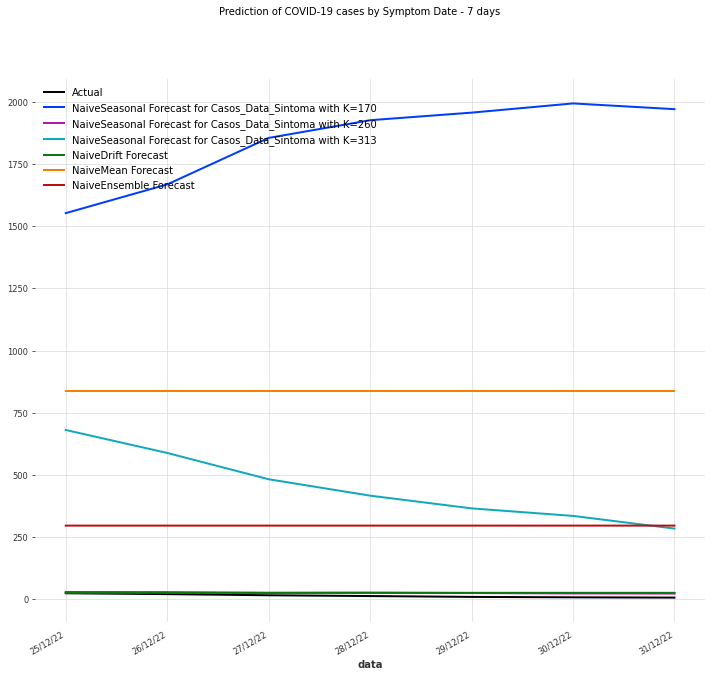

In [ ]:
fig, ax = plt.subplots(figsize=(12,10));
fig.suptitle('Prediction of COVID-19 cases by Symptom Date - '+str(num_dias_val)+' days', fontsize=10);
val_sintoma.plot(label='Actual')
plotar_NaiveSeasonal(ns_casos_sintoma)
nd_casos_sintoma.plot(label='NaiveDrift Forecast')
nm_casos_sintoma.plot(label='NaiveMean Forecast')
ne_casos_sintoma.plot(label='NaiveEnsemble Forecast')
ax.xaxis.set_major_formatter(DateFormatter("%d/%m/%y"))
fig.savefig('/content/drive/MyDrive/NPCA - COVID/_CASOS/Figs/Naive_casos_data_sintoma.png', dpi=300, transparent=False, bbox_inches='tight')

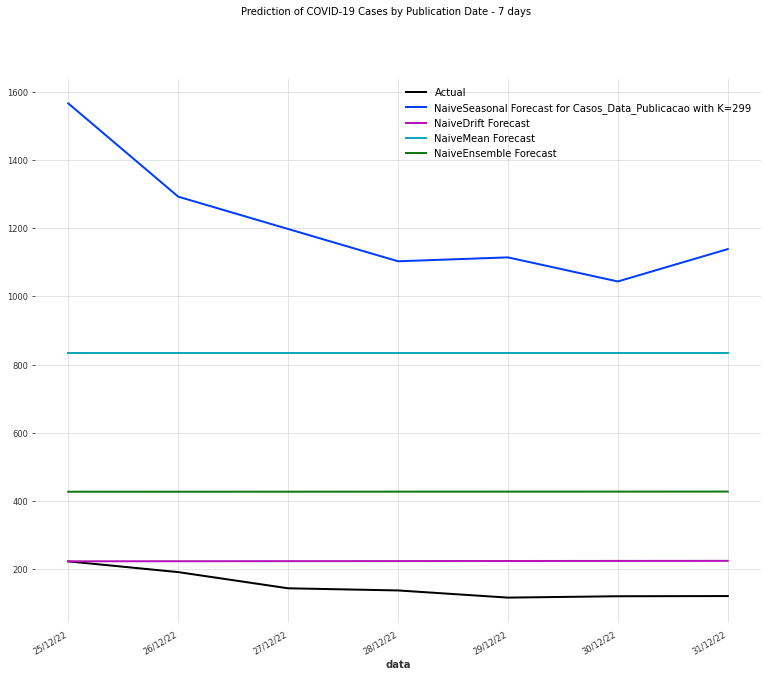

In [ ]:
fig, ax = plt.subplots(figsize=(13,10));
fig.suptitle('Prediction of COVID-19 Cases by Publication Date - '+str(num_dias_val)+' days', fontsize=10);
val_publicacao.plot(label='Actual')
plotar_NaiveSeasonal(ns_casos_publicacao)
nd_casos_publicacao.plot(label='NaiveDrift Forecast')
nm_casos_publicacao.plot(label='NaiveMean Forecast')
ne_casos_publicacao.plot(label='NaiveEnsemble Forecast')
ax.xaxis.set_major_formatter(DateFormatter("%d/%m/%y"))
fig.savefig('/content/drive/MyDrive/NPCA - COVID/_CASOS/Figs/Naive_casos_data_publicacao.png', dpi=300, transparent=False, bbox_inches='tight')

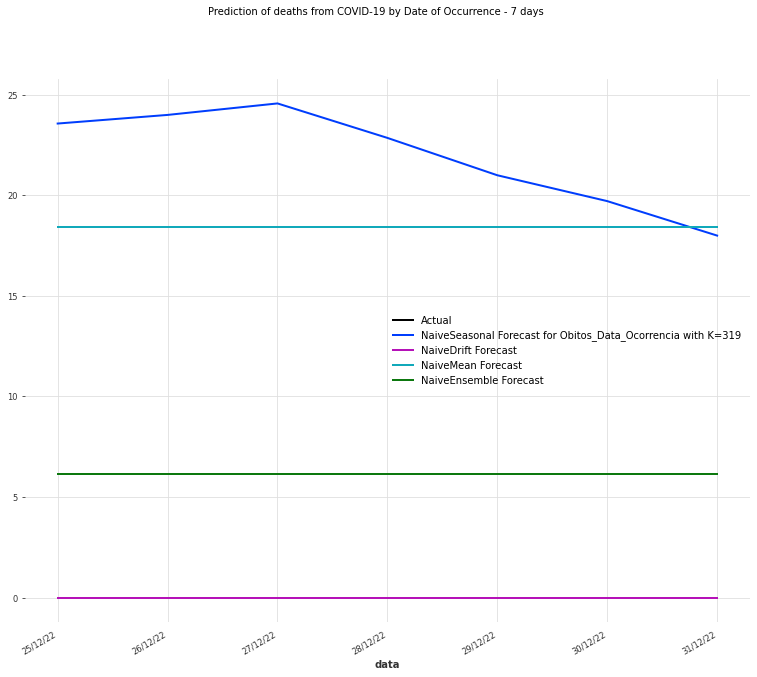

In [ ]:
fig, ax = plt.subplots(figsize=(13,10));
fig.suptitle('Prediction of deaths from COVID-19 by Date of Occurrence - '+str(num_dias_val)+' days', fontsize=10);
val_obito_ocorrencia.plot(label='Actual')
plotar_NaiveSeasonal(ns_obitos_ocorrencia)
nd_obitos_ocorrencia.plot(label='NaiveDrift Forecast')
nm_obitos_ocorrencia.plot(label='NaiveMean Forecast')
ne_obitos_ocorrencia.plot(label='NaiveEnsemble Forecast')
ax.xaxis.set_major_formatter(DateFormatter("%d/%m/%y"))
fig.savefig('/content/drive/MyDrive/NPCA - COVID/_CASOS/Figs/Naive_obitos_data_ocorrencia.png', dpi=300, transparent=False, bbox_inches='tight')

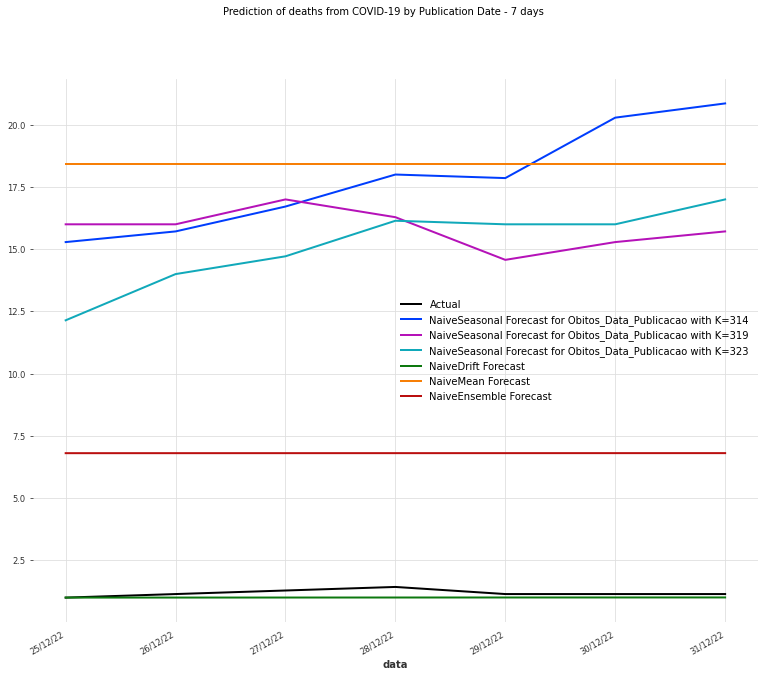

In [ ]:
fig, ax = plt.subplots(figsize=(13,10));
fig.suptitle('Prediction of deaths from COVID-19 by Publication Date - '+str(num_dias_val)+' days', fontsize=10);
val_obito_publicacao.plot(label='Actual')
plotar_NaiveSeasonal(ns_obitos_publicacao)
nd_obitos_publicacao.plot(label='NaiveDrift Forecast')
nm_obitos_publicacao.plot(label='NaiveMean Forecast')
ne_obitos_publicacao.plot(label='NaiveEnsemble Forecast')
ax.xaxis.set_major_formatter(DateFormatter("%d/%m/%y"))
fig.savefig('/content/drive/MyDrive/NPCA - COVID/_CASOS/Figs/Naive_obitos_data_publicacao.png', dpi=300, transparent=False, bbox_inches='tight')

##Métricas de erro

In [ ]:
#Funções para calcular as métricas do modelo NaiveSeasonal
def mape_NaiveSeasonal (serie_temporal, list):
    for x in list:
     a, b, c = x
     NaiveSeasonal_model = NaiveSeasonal(K=a)
     print('Modelo {} obteve MAPE: {:.2f}%'.format(NaiveSeasonal_model, mape(serie_temporal, b)))

def rmse_NaiveSeasonal (serie_temporal, list):
    for x in list:
     a, b, c = x
     NaiveSeasonal_model = NaiveSeasonal(K=a)
     print('Modelo {} obteve RMSE: {:.2f}'.format(NaiveSeasonal_model, rmse(serie_temporal, b)))

Porcentagens das Métricas de erro para casos por data de sintoma

In [ ]:
mape_NaiveSeasonal(val_sintoma, ns_casos_sintoma)
print('Modelo {} obteve MAPE: {:.2f}%'.format(NaiveDrift_model, mape(val_sintoma, nd_casos_sintoma)))
print('Modelo {} obteve MAPE: {:.2f}%'.format(NaiveMean_model, mape(val_sintoma, nm_casos_sintoma)))
print('Modelo {} obteve MAPE: {:.2f}%'.format(NaiveEnsemble_model, mape(val_sintoma, ne_casos_sintoma)))

Modelo Naive seasonal model, with K=170 obteve MAPE: 15746.76%
Modelo Naive seasonal model, with K=260 obteve MAPE: 112.87%
Modelo Naive seasonal model, with K=313 obteve MAPE: 3222.87%
Modelo Naive drift model obteve MAPE: 119.33%
Modelo Naive mean predictor model obteve MAPE: 6875.34%
Modelo <darts.models.forecasting.baselines.NaiveEnsembleModel object at 0x7fcad7300ee0> obteve MAPE: 2371.26%


In [ ]:
rmse_NaiveSeasonal(val_sintoma, ns_casos_sintoma)
print('Modelo {} obteve RMSE: {:.2f}'.format(NaiveDrift_model, rmse(val_sintoma, nd_casos_sintoma)))
print('Modelo {} obteve RMSE: {:.2f}'.format(NaiveMean_model, rmse(val_sintoma, nm_casos_sintoma)))
print('Modelo {} obteve RMSE: {:.2f}'.format(NaiveEnsemble_model, rmse(val_sintoma, ne_casos_sintoma)))

Modelo Naive seasonal model, with K=170 obteve RMSE: 1838.36
Modelo Naive seasonal model, with K=260 obteve RMSE: 12.64
Modelo Naive seasonal model, with K=313 obteve RMSE: 454.01
Modelo Naive drift model obteve RMSE: 13.36
Modelo Naive mean predictor model obteve RMSE: 822.38
Modelo <darts.models.forecasting.baselines.NaiveEnsembleModel object at 0x7fcad7300ee0> obteve RMSE: 282.08


Porcentagens das Métricas de erro para casos por data de publicação

In [ ]:
mape_NaiveSeasonal(val_publicacao, ns_casos_publicacao)
print('Modelo {} obteve MAPE: {:.2f}%'.format(NaiveDrift_model, mape(val_publicacao, nd_casos_publicacao)))
print('Modelo {} obteve MAPE: {:.2f}%'.format(NaiveMean_model, mape(val_sintoma, nm_casos_publicacao)))
print('Modelo {} obteve MAPE: {:.2f}%'.format(NaiveEnsemble_model, mape(val_sintoma, ne_casos_publicacao)))

Modelo Naive seasonal model, with K=299 obteve MAPE: 718.94%
Modelo Naive drift model obteve MAPE: 56.33%
Modelo Naive mean predictor model obteve MAPE: 6864.84%
Modelo <darts.models.forecasting.baselines.NaiveEnsembleModel object at 0x7fcad7300ee0> obteve MAPE: 3467.74%


In [ ]:
rmse_NaiveSeasonal(val_publicacao, ns_casos_publicacao)
print('Modelo {} obteve RMSE: {:.2f}'.format(NaiveDrift_model, rmse(val_publicacao, nd_casos_publicacao)))
print('Modelo {} obteve RMSE: {:.2f}'.format(NaiveMean_model, rmse(val_publicacao, nm_casos_publicacao)))
print('Modelo {} obteve RMSE: {:.2f}'.format(NaiveEnsemble_model, rmse(val_publicacao, ne_casos_publicacao)))

Modelo Naive seasonal model, with K=299 obteve RMSE: 1063.97
Modelo Naive drift model obteve RMSE: 82.43
Modelo Naive mean predictor model obteve RMSE: 685.06
Modelo <darts.models.forecasting.baselines.NaiveEnsembleModel object at 0x7fcad7300ee0> obteve RMSE: 279.01


Porcentagens das Métricas de erro para óbitos por data de ocorrencia

In [ ]:
mape_NaiveSeasonal(val_obito_ocorrencia, ns_obitos_ocorrencia)
print('Modelo {} obteve MAPE: {:.2f}%'.format(NaiveDrift_model, mape(val_obito_ocorrencia, nd_obitos_ocorrencia)))
print('Modelo {} obteve MAPE: {:.2f}%'.format(NaiveMean_model, mape(val_obito_ocorrencia, nm_obitos_ocorrencia)))
print('Modelo {} obteve MAPE: {:.2f}%'.format(NaiveEnsemble_model, mape(val_obito_ocorrencia, ne_obitos_ocorrencia)))

Modelo Naive seasonal model, with K=319 obteve MAPE: 219591736.73%
Modelo Naive drift model obteve MAPE: 0.00%
Modelo Naive mean predictor model obteve MAPE: 184217591.45%
Modelo <darts.models.forecasting.baselines.NaiveEnsembleModel object at 0x7fcad7300ee0> obteve MAPE: 61405863.82%


In [ ]:
rmse_NaiveSeasonal(val_obito_ocorrencia, ns_obitos_ocorrencia)
print('Modelo {} obteve RMSE: {:.2f}'.format(NaiveDrift_model, rmse(val_obito_ocorrencia, nd_obitos_ocorrencia)))
print('Modelo {} obteve RMSE: {:.2f}'.format(NaiveMean_model, rmse(val_obito_ocorrencia, nm_obitos_ocorrencia)))
print('Modelo {} obteve RMSE: {:.2f}'.format(NaiveEnsemble_model, rmse(val_obito_ocorrencia, ne_obitos_ocorrencia)))

Modelo Naive seasonal model, with K=319 obteve RMSE: 22.08
Modelo Naive drift model obteve RMSE: 0.00
Modelo Naive mean predictor model obteve RMSE: 18.42
Modelo <darts.models.forecasting.baselines.NaiveEnsembleModel object at 0x7fcad7300ee0> obteve RMSE: 6.14


Porcentagens das Métricas de erro para óbitos por data de publicação

In [ ]:
mape_NaiveSeasonal(val_obito_publicacao, ns_obitos_publicacao)
print('Modelo {} obteve MAPE: {:.2f}%'.format(NaiveDrift_model, mape(val_obito_publicacao, nd_obitos_publicacao)))
print('Modelo {} obteve MAPE: {:.2f}%'.format(NaiveMean_model, mape(val_obito_publicacao, nm_obitos_publicacao)))
print('Modelo {} obteve MAPE: {:.2f}%'.format(NaiveEnsemble_model, mape(val_obito_publicacao, ne_obitos_publicacao)))

Modelo Naive seasonal model, with K=314 obteve MAPE: 1418.01%
Modelo Naive seasonal model, with K=319 obteve MAPE: 1249.96%
Modelo Naive seasonal model, with K=323 obteve MAPE: 1185.89%
Modelo Naive drift model obteve MAPE: 14.30%
Modelo Naive mean predictor model obteve MAPE: 1472.18%
Modelo <darts.models.forecasting.baselines.NaiveEnsembleModel object at 0x7fcad7300ee0> obteve MAPE: 481.10%


In [ ]:
rmse_NaiveSeasonal(val_obito_publicacao, ns_obitos_publicacao)
print('Modelo {} obteve RMSE: {:.2f}'.format(NaiveDrift_model, rmse(val_obito_publicacao, nd_obitos_publicacao)))
print('Modelo {} obteve RMSE: {:.2f}'.format(NaiveMean_model, rmse(val_obito_publicacao, nm_obitos_publicacao)))
print('Modelo {} obteve RMSE: {:.2f}'.format(NaiveEnsemble_model, rmse(val_obito_publicacao, ne_obitos_publicacao)))

Modelo Naive seasonal model, with K=314 obteve RMSE: 16.75
Modelo Naive seasonal model, with K=319 obteve RMSE: 14.67
Modelo Naive seasonal model, with K=323 obteve RMSE: 14.04
Modelo Naive drift model obteve RMSE: 0.22
Modelo Naive mean predictor model obteve RMSE: 17.23
Modelo <darts.models.forecasting.baselines.NaiveEnsembleModel object at 0x7fcad7300ee0> obteve RMSE: 5.62


Continua no script de TREINAR MODELOS.

Link:  https://colab.research.google.com/drive/1oIdU_g1U0IDrsOvJxumXP5-wES2Fcius